In [360]:
df=spark.read.csv("/home/ubuntu/Downloads/Take1.csv", header=True, sep=";")

In [361]:
df.printSchema()

root
 |-- EventTrackSequentialID: string (nullable = true)
 |-- OwnerIdentity: string (nullable = true)
 |-- StorageDate: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Action: string (nullable = true)



In [362]:
df.show()

+----------------------+--------------------+--------------------+-----------------+--------------------+
|EventTrackSequentialID|       OwnerIdentity|         StorageDate|         Category|              Action|
+----------------------+--------------------+--------------------+-----------------+--------------------+
|                   100|carnabelo@msging.net|2018-02-02 13:51:...|             Flow|         Boas vindas|
|                   101|carnabelo@msging.net|2018-02-02 13:52:...|             Flow|    Objetivo - Beber|
|                   102|carnabelo@msging.net|2018-02-02 13:52:...|         Objetivo|               Beber|
|                   103|carnabelo@msging.net|2018-02-02 13:52:...|             Flow|               Intro|
|                   104|carnabelo@msging.net|2018-02-02 13:52:...|             Flow|                Menu|
|                   105|carnabelo@msging.net|2018-02-02 13:52:...|             Flow|     Selecionar data|
|                   106|carnabelo@msging.net|2

In [363]:
from pyspark.sql import functions as F
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import pandas

In [364]:
df.groupBy('Action','Category') \
    .agg(F.count('Action').alias('Total')) \
    .orderBy('Total', ascending=False) \
    .toPandas().head(20)

,Action,Category,Total
0,Respostas para carrossel,Flow,4369
1,API - Carrossel blocos - Agenda,Flow,2498
2,Fallback - Diversos,Flow,1967
3,Fallback - IA,Flow,1936
4,Selecionar data,Flow,1918
5,Fallback - Musica,Flow,1907
6,API - Buscar info do bloco,Flow,1848
7,Menu,Flow,1543
8,API - Carrossel - Bairro,Flow,1460
9,Fallback - Nome de Bloco,Flow,1352


In [365]:
#Visto que o top 20 do dataframe acima aponta apenas categoria 'flow', decidi filtrar categoria diferente de flow.
df_take1 = df.filter((df['Category'] != 'Flow'))

In [366]:
df_take1.groupBy('Action','Category') \
    .agg(F.count('Action').alias('Total')) \
    .orderBy('Total', ascending=False) \
    .toPandas().head(20)

,Action,Category,Total
0,Centro,Pesquisa - Bairro,657
1,Floresta,Pesquisa - Bairro,362
2,10/02/2018,Pesquisa - Dia,351
3,Funcionários,Pesquisa - Bairro,348
4,Dancar,Objetivo,335
5,11/02/2018,Pesquisa - Dia,302
6,Santa Tereza,Pesquisa - Bairro,267
7,12/02/2018,Pesquisa - Dia,252
8,Tudo,Objetivo,236
9,13/02/2018,Pesquisa - Dia,217


In [367]:
df_obj = df.filter((df['Category'] == 'Objetivo'))

df_obj1 = df_obj.groupBy('Action','Category') \
    .agg(F.count('Action').alias('Total')) \
    .orderBy('Total', ascending=False) \
    .toPandas()

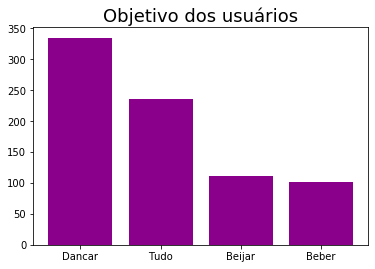

In [368]:
plt.title('Objetivo dos usuários', fontsize = 18)
plt.bar(df_obj1.Action, df_obj1.Total, label='2x', color= 'darkmagenta')
plt.show()

In [369]:
df_bairro = df.filter((df['Category'] == 'Pesquisa - Bairro'))

df_bairro1 = df_bairro.groupBy('Action','Category') \
    .agg(F.count('Action').alias('Total')) \
    .orderBy('Total', ascending=False) \
    .toPandas().head(4)

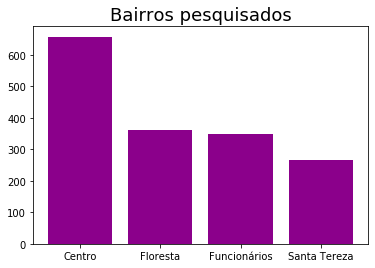

In [370]:
plt.title('Bairros pesquisados', fontsize = 18)
plt.bar(df_bairro1.Action, df_bairro1.Total, label='2x', color= 'darkmagenta')
plt.show()

In [371]:
df_dia = df.filter((df['Category'] == 'Pesquisa - Dia'))

df_dia1 = df_dia.groupBy('Action','Category') \
    .agg(F.count('Action').alias('Total')) \
    .orderBy('Total', ascending = False) \
    .toPandas().head(5)

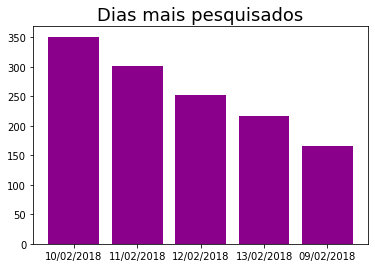

In [372]:
plt.title('Dias mais pesquisados', fontsize = 18)
plt.bar(df_dia1.Action, df_dia1.Total, label='2x', color= 'darkmagenta')
plt.show()

In [373]:
df_satisfacao = df.filter((df['Category'] == 'broad-Pesquisa_Satisfacao'))

df_satisfacao1 = df_satisfacao.groupBy('Action','Category') \
    .agg(F.count('Action').alias('Total')) \
    .orderBy('Total', ascending=False) \
    .toPandas()

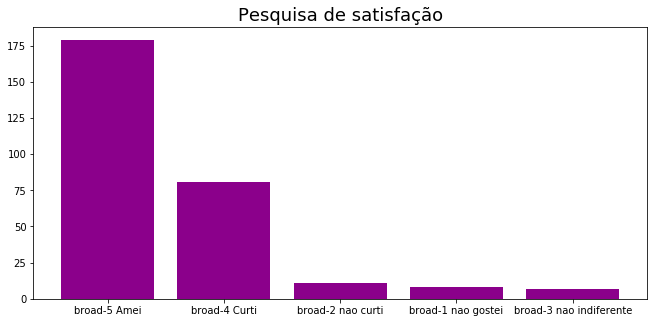

In [377]:
plt.figure(figsize=(11,5))
plt.title('Pesquisa de satisfação', fontsize = 18)
bars = plt.bar(df_satisfacao1.Action, df_satisfacao1.Total, color= 'darkmagenta')
plt.show()

In [375]:
df_foto = df.filter((df['Category'] == 'Envio de foto'))

df_foto.groupBy('Action','Category') \
    .agg(F.count('Action').alias('Total')) \
    .orderBy('Total', ascending=False) \
    .toPandas()

,Action,Category,Total
0,Pode publicar foto,Envio de foto,102
1,Nao pode publicar,Envio de foto,26
